In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [4]:
archivo = pd.read_csv("gye.csv",index_col=0, encoding='latin-1')
df = pd.DataFrame(archivo)
df
#Importación de data desde CSV en la misma carpeta

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973


In [5]:
df.describe()

,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [6]:
#Top 10 Canales de YouTube por Suscriptores
top10 = df.nlargest(10,"subscribers")["Youtuber"]
print(top10)

rank
1                       T-Series
2                 YouTube Movies
3                        MrBeast
4     Cocomelon - Nursery Rhymes
5                      SET India
6                          Music
7            ýýý Kids Diana Show
8                      PewDiePie
9                    Like Nastya
10                 Vlad and Niki
Name: Youtuber, dtype: object


El top 10 de Youtubers (considerando solo los suscriptores) tiene una buena variedad de contenido.

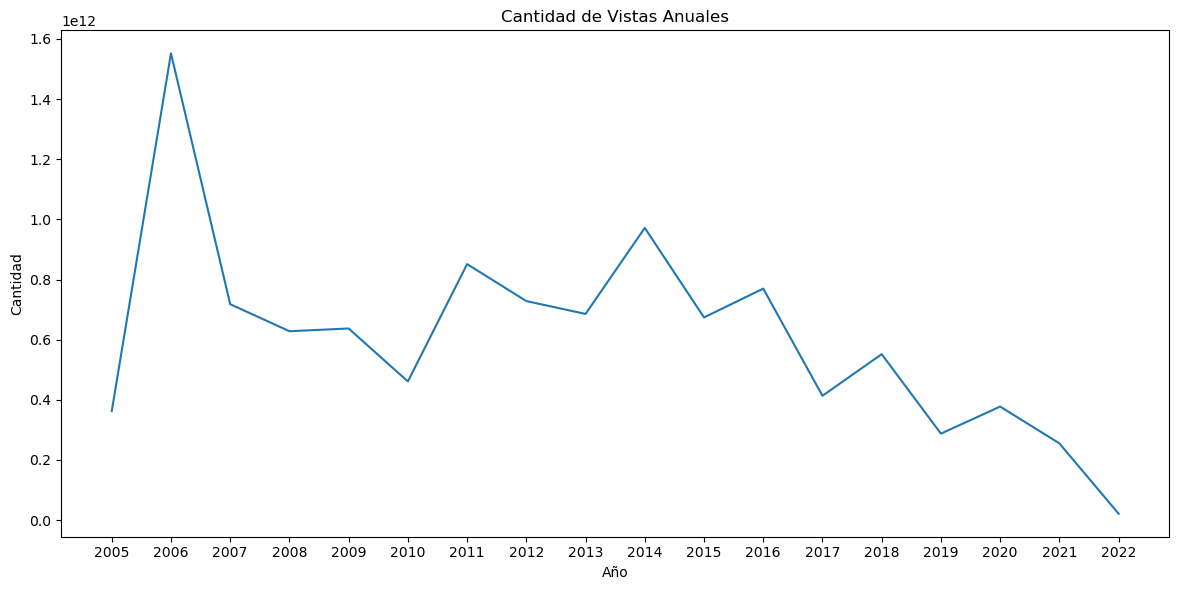

In [7]:
#Cantidad de Vistas Anuales totales
filtered_df = df[df["created_year"] != 1970]
views_by_year = filtered_df.groupby("created_year")["video views"].sum()


plt.figure(figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de Vistas Anuales')
plt.tight_layout()  # Ajustar el diseño para una mejor visualización
plt.xticks(views_by_year.index)  # Establecer los valores del eje X
plt.yscale("linear")
plt.plot(views_by_year)


plt.show()

En la cantidad de vistas anuales, el año 2006 se caracteriza por tener uno de sus mayores peaks con un número cercano a 1.6MM, para más adelante presentar una tendencia a la baja respecto al total de vistas.

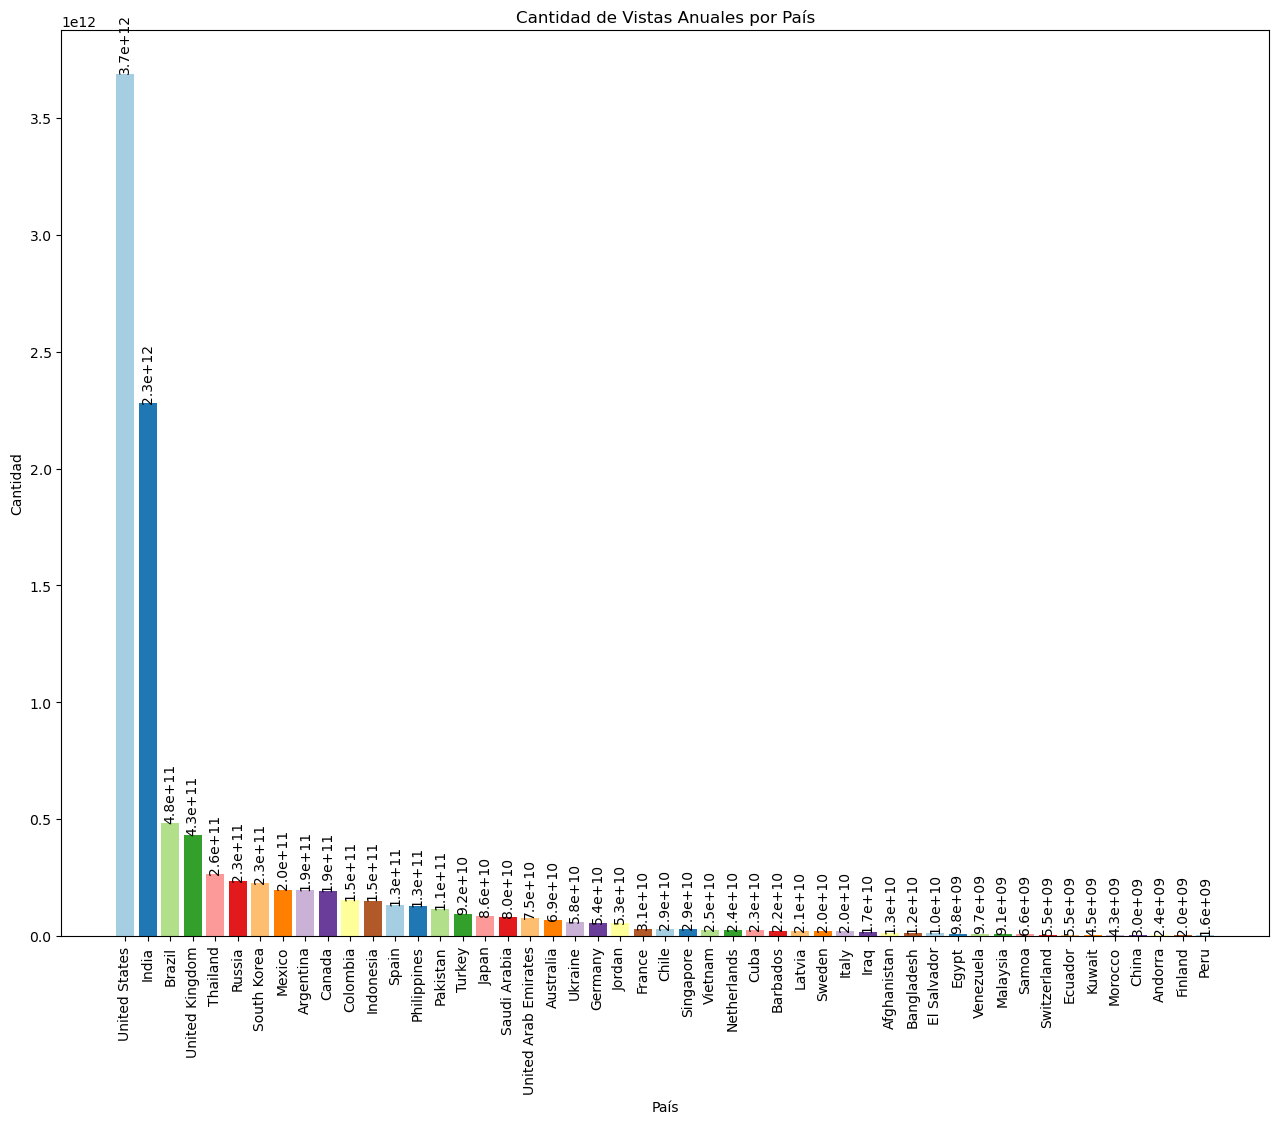

In [8]:
#Cantidad de Vistas Anuales totales por País
views_by_country = (df.groupby("Country")["video views"].sum().sort_values(ascending=False))

plt.figure(figsize=(13, 10))
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Cantidad de Vistas Anuales por País')
plt.tight_layout()  # Ajustar el diseño para una mejor visualización
plt.xticks(rotation=90)
bars = plt.bar(views_by_country.index, views_by_country.values, color=plt.cm.Paired.colors)


# Agregar etiquetas de valor en las barras y rotar en 90 grados
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, "{:.1e}".format(yval), ha='center', va='bottom', rotation=90)

plt.show()

El país con más visualizaciones totales históricos es Estados Unidos, por segundo lugar India y tercero Brazil. Información clave en caso de necesitar toma de decisiones para potenciales estrategias que involucren una mayor cantidad de público en la plataforma.

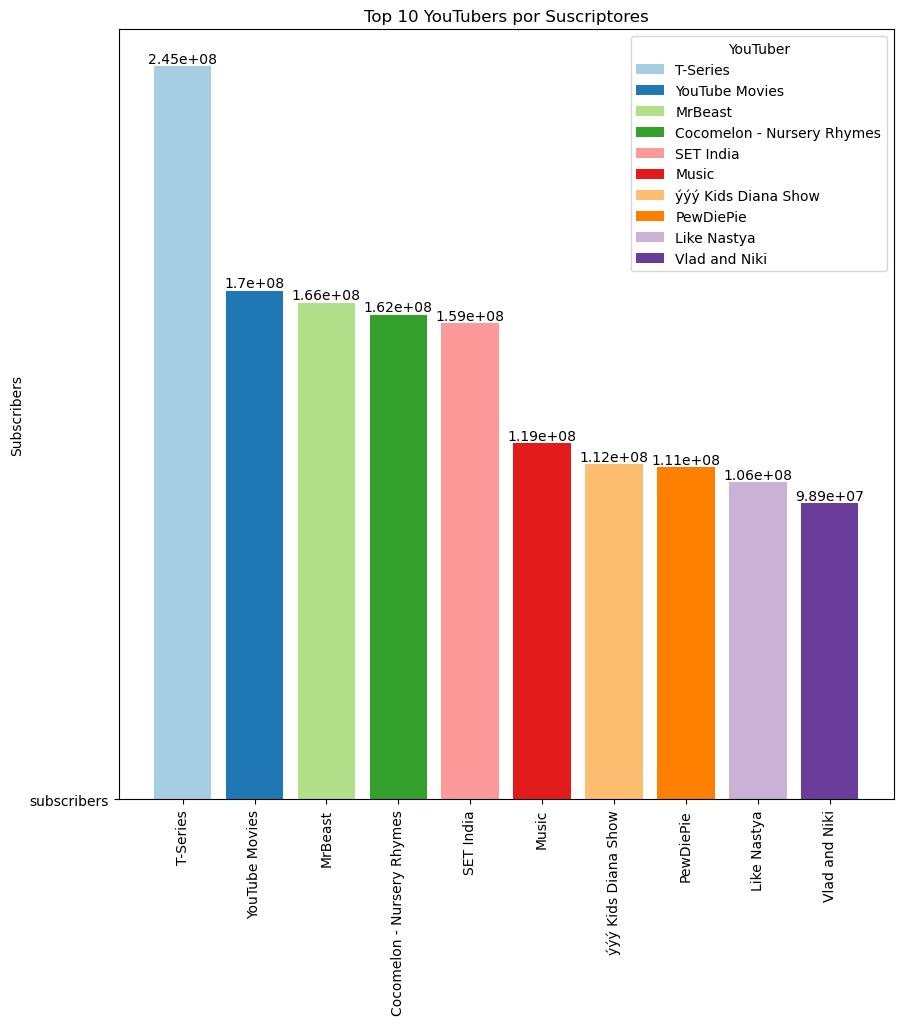

In [9]:
#Top 10 YouTubers por Suscriptores
fig, ax = plt.subplots(figsize=(10,10))
bar_labels = (top10)
bar_colors = plt.cm.Paired.colors

plt.bar(df.nlargest(10,"subscribers")["Youtuber"],"subscribers")

bar = ax.bar(top10, df.nlargest(10,"subscribers")["subscribers"], label=bar_labels, color=bar_colors)

ax.set_ylabel('Subscribers')
ax.set_title('Top 10 YouTubers por Suscriptores')
ax.legend(title='YouTuber')
ax.bar_label(bar)
plt.xticks(rotation=90)
plt.show()

Dentro de los Youtubers con mayor número de suscriptres, se encuentra T-Series, YouTube Movies y MrBeast

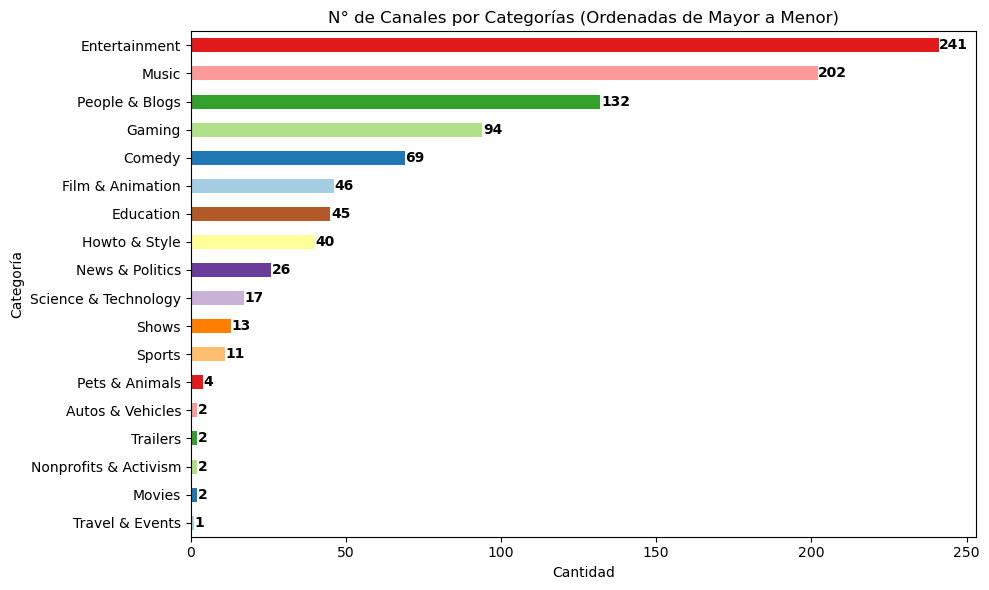

In [10]:
#Número de canales que hay por categoría
category_counts = df['category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind='barh', color=plt.cm.Paired.colors)
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.title('N° de Canales por Categorías (Ordenadas de Mayor a Menor)')
plt.tight_layout()  # Ajustar el diseño para una mejor visualización

# Mostrar los valores en las barras
for i, v in enumerate(category_counts):
    ax.text(v + 0.2, i, str(v), va='center', color='black', fontweight='bold')

plt.show()

Dentro de la plataforma, una de las categorías que está más saturada de canales es el Entretenimiento, seguido de la Música y los Blogs.

C:\Users\lyroooi\AppData\Local\Temp\ipykernel_7588\1039063548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df.corr()


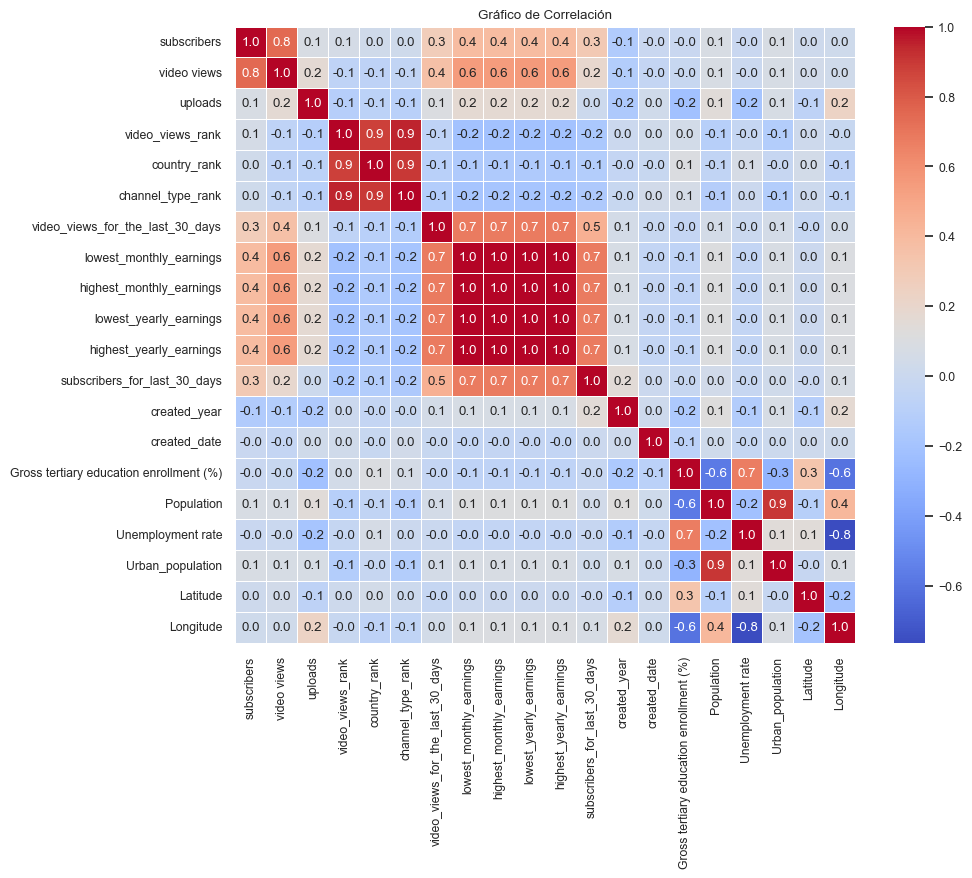

In [11]:
#Correlación entre cada una de las variables en la tabla
corr1 = df.corr()
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Ajustar el tamaño de la fuente
sns.heatmap(corr1, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Gráfico de Correlación")
plt.show()

Teniendo en consideración todas las variables que están afectando el rendimiento de los Youtubers, las más fuertes se encuentranen la cantidad de vistas de los últimos 30 días y los ingresos directos, como así también la cantidad de vistas en los videos con los ingresos.

In [29]:
#Vistas promedio por video subido en el top 10 de YouTubers


top_10 = df.sort_values(by = "video views", ascending=False).head(10)

# Calcular el promedio de vistas por video para cada YouTuber
top_10["Avg Views per Video"] = top_10["video views"] / top_10["uploads"]

t10 = top_10.sort_values(by = "Avg Views per Video", ascending=False)
print(t10[["Youtuber","Avg Views per Video"]])

                        Youtuber  Avg Views per Video
rank                                                 
9                    Like Nastya         1.835275e+08
4     Cocomelon - Nursery Rhymes         1.697723e+08
10                 Vlad and Niki         1.344602e+08
7            ýýý Kids Diana Show         8.393073e+07
1                       T-Series         1.135345e+07
16                      Sony SAB         1.417146e+06
5                      SET India         1.269994e+06
12                           WWE         1.104118e+06
22                        Zee TV         5.660742e+05
27                     Colors TV         5.447541e+05


Like Nastya y Colomelon son los canales con la mayor cantidad de vistas promedio por video

,category,Youtuber,subscribers
rank,,,
1,Music,T-Series,245000000
2,Film & Animation,YouTube Movies,170000000
3,Entertainment,MrBeast,166000000
4,Education,Cocomelon - Nursery Rhymes,162000000
5,Shows,SET India,159000000
7,People & Blogs,ýýý Kids Diana Show,112000000
8,Gaming,PewDiePie,111000000
12,Sports,WWE,96000000
17,Howto & Style,5-Minute Crafts,80100000


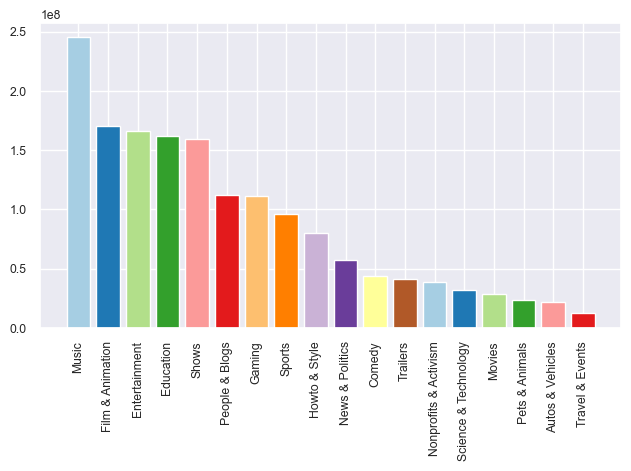

In [122]:
#Canal Top en Suscriptores por cada Categoría

# Encontrar el índice del canal top de suscriptores por cada categoría
top_indices = df.groupby("category")["subscribers"].idxmax().sort_values(ascending=True)

# Usar los índices para seleccionar los canales top de cada categoría
top_channels = df.loc[top_indices, ["category", "Youtuber", "subscribers"]]

plt.bar(top_channels["category"],top_channels["subscribers"], color=plt.cm.Paired.colors)
plt.xticks(rotation=90)
plt.tight_layout()
top_channels

T-Series es el canal con mayor suscriptores de la categoría de música